<a href="https://colab.research.google.com/github/shpark02084/TensorFlow/blob/main/Computer_Vision_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [4]:
#split data into 70% train, 30% test
split_data = ['train[:70%]', 'train[70%:]']

(train_data, test_data), ds_info = tfds.load(name="cats_vs_dogs", 
                                             split=split_data, 
                                             shuffle_files=True, 
                                             as_supervised=True, 
                                             with_info=True)



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteYFSK03/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [5]:
# Get info
ds_info.features


FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})

In [6]:
# Get label
class_names = ds_info.features["label"].names
class_names

['cat', 'dog']

In [7]:
# Take one sample
sample = train_data.take(1) 
for image, label in sample:
  print(f"""
  Class name : {class_names[label.numpy()]}
        """)


  Class name : dog
        


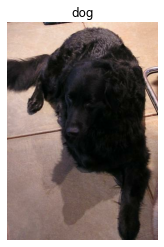

In [8]:
# Visualize
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [13]:
# Resize 
INPUT_SIZE = 224
def preprocessing(image, label):
  
    return tf.image.resize(image, [INPUT_SIZE, INPUT_SIZE]) / 255, label

In [14]:
train_data = train_data.map(preprocessing).batch(32)
test_data = test_data.map(preprocessing).batch(32)


## Model 1

In [22]:
# Model 1 CNN
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [23]:
# Compile 
model_1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Fit
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
509/509 [==============================] - 38s 73ms/step - loss: 0.6714 - accuracy: 0.5691 - val_loss: 0.6559 - val_accuracy: 0.6008
Epoch 2/5
509/509 [==============================] - 34s 67ms/step - loss: 0.6406 - accuracy: 0.6169 - val_loss: 0.6342 - val_accuracy: 0.6416
Epoch 3/5
509/509 [==============================] - 34s 66ms/step - loss: 0.6192 - accuracy: 0.6416 - val_loss: 0.6043 - val_accuracy: 0.6687
Epoch 4/5
509/509 [==============================] - 35s 68ms/step - loss: 0.6060 - accuracy: 0.6566 - val_loss: 0.5978 - val_accuracy: 0.6846
Epoch 5/5
509/509 [==============================] - 34s 67ms/step - loss: 0.5941 - accuracy: 0.6635 - val_loss: 0.5814 - val_accuracy: 0.6931


In [25]:
model_1.evaluate(test_data)

219/219 [==============================] - 9s 41ms/step - loss: 0.5814 - accuracy: 0.6931


[0.581383228302002, 0.6930792331695557]

Model 1 Accuracy : 69.31%

In [27]:
model_1.save('model_1.h5')

## Model 2

In [19]:
# Model 2 CNN with ADAM optimizer
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])
# Compile 
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
509/509 [==============================] - 36s 68ms/step - loss: 0.6242 - accuracy: 0.6337 - val_loss: 0.5695 - val_accuracy: 0.7048
Epoch 2/5
509/509 [==============================] - 35s 69ms/step - loss: 0.5271 - accuracy: 0.7339 - val_loss: 0.5163 - val_accuracy: 0.7477
Epoch 3/5
509/509 [==============================] - 35s 68ms/step - loss: 0.4556 - accuracy: 0.7846 - val_loss: 0.5144 - val_accuracy: 0.7510
Epoch 4/5
509/509 [==============================] - 34s 67ms/step - loss: 0.3922 - accuracy: 0.8226 - val_loss: 0.5707 - val_accuracy: 0.7372
Epoch 5/5
509/509 [==============================] - 34s 67ms/step - loss: 0.3256 - accuracy: 0.8612 - val_loss: 0.6600 - val_accuracy: 0.7285


In [28]:
model_2.evaluate(test_data)

219/219 [==============================] - 11s 50ms/step - loss: 0.6600 - accuracy: 0.7285


[0.6600064635276794, 0.7284711003303528]

Model 2 Accuracy 0.7285